# **COMPARISION OF DIFFERENT OPTIMIZERS ON IRIS DATASET- SGD ,ADAM AND RMSPROP OPTIMIZERS**

* Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

* Loading the Iris dataset

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

* Standardize the dataset

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

* Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* One hot encoding the target variable

In [ ]:
y_train_one_hot = np.eye(3)[y_train]
y_test_one_hot = np.eye(3)[y_test]

* Defining the Softmax activation function

In [ ]:
def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

* Defining the Cross Entropy Loss function

In [ ]:
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

* SGD Optimizer

In [ ]:
def sgd_optimizer(X, y, lr, epochs):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]
    W = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))

    train_acc = []
    test_acc = []

    for epoch in range(epochs):
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)
        loss = cross_entropy_loss(y, y_pred)

        grad_W = np.dot(X.T, (y_pred - y)) / n_samples
        grad_b = np.sum(y_pred - y, axis=0, keepdims=True) / n_samples

        W -= lr * grad_W
        b -= lr * grad_b

        train_acc.append(accuracy(y, y_pred))
        test_acc.append(accuracy(y_test_one_hot, softmax(np.dot(X_test, W) + b)))

    return W, b, train_acc, test_acc

* Adam Optimizer

In [ ]:
def adam_optimizer(X, y, lr, epochs, beta1=0.9, beta2=0.999, epsilon=1e-8):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]
    W = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))

    m_W, v_W = np.zeros_like(W), np.zeros_like(W)
    m_b, v_b = np.zeros_like(b), np.zeros_like(b)

    train_acc = []
    test_acc = []

    for epoch in range(epochs):
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)
        loss = cross_entropy_loss(y, y_pred)

        grad_W = np.dot(X.T, (y_pred - y)) / n_samples
        grad_b = np.sum(y_pred - y, axis=0, keepdims=True) / n_samples

        m_W = beta1 * m_W + (1 - beta1) * grad_W
        v_W = beta2 * v_W + (1 - beta2) * grad_W**2
        m_W_hat = m_W / (1 - beta1**(epoch + 1))
        v_W_hat = v_W / (1 - beta2**(epoch + 1))

        m_b = beta1 * m_b + (1 - beta1) * grad_b
        v_b = beta2 * v_b + (1 - beta2) * grad_b**2
        m_b_hat = m_b / (1 - beta1**(epoch + 1))
        v_b_hat = v_b / (1 - beta2**(epoch + 1))

        W -= lr * m_W_hat / (np.sqrt(v_W_hat) + epsilon)
        b -= lr * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

        train_acc.append(accuracy(y, y_pred))
        test_acc.append(accuracy(y_test_one_hot, softmax(np.dot(X_test, W) + b)))

    return W, b, train_acc, test_acc

* RMSProp Optimizer

In [ ]:
def rmsprop_optimizer(X, y, lr, epochs, beta=0.9, epsilon=1e-8):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]
    W = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))

    s_W, s_b = np.zeros_like(W), np.zeros_like(b)

    train_acc = []
    test_acc = []

    for epoch in range(epochs):
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)
        loss = cross_entropy_loss(y, y_pred)

        grad_W = np.dot(X.T, (y_pred - y)) / n_samples
        grad_b = np.sum(y_pred - y, axis=0, keepdims=True) / n_samples

        s_W = beta * s_W + (1 - beta) * grad_W**2
        s_b = beta * s_b + (1 - beta) * grad_b**2

        W -= lr * grad_W / (np.sqrt(s_W) + epsilon)
        b -= lr * grad_b / (np.sqrt(s_b) + epsilon)

        train_acc.append(accuracy(y, y_pred))
        test_acc.append(accuracy(y_test_one_hot, softmax(np.dot(X_test, W) + b)))

    return W, b, train_acc, test_acc

* Function to evaluate optimizer

In [ ]:
def evaluate_optimizer(optimizer, X_train, y_train, X_test, y_test, lr, epochs):
    W, b, train_acc, test_acc = optimizer(X_train, y_train, lr, epochs)
    return train_acc, test_acc

* Setting the learning rate and number of epochs

In [ ]:
learning_rate = 0.01
epochs = 500

In [ ]:
optimizers = {
    'SGD': sgd_optimizer,
    'Adam': adam_optimizer,
    'RMSprop': rmsprop_optimizer
}

* Results

In [ ]:
results = {}

for name, optimizer in optimizers.items():
    train_acc, test_acc = evaluate_optimizer(optimizer, X_train, y_train_one_hot, X_test, y_test_one_hot, learning_rate, epochs)
    results[name] = {'train_acc': train_acc, 'test_acc': test_acc}

In [ ]:
print(results)

{'SGD': {'train_acc': [0.3333333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.808333333333333

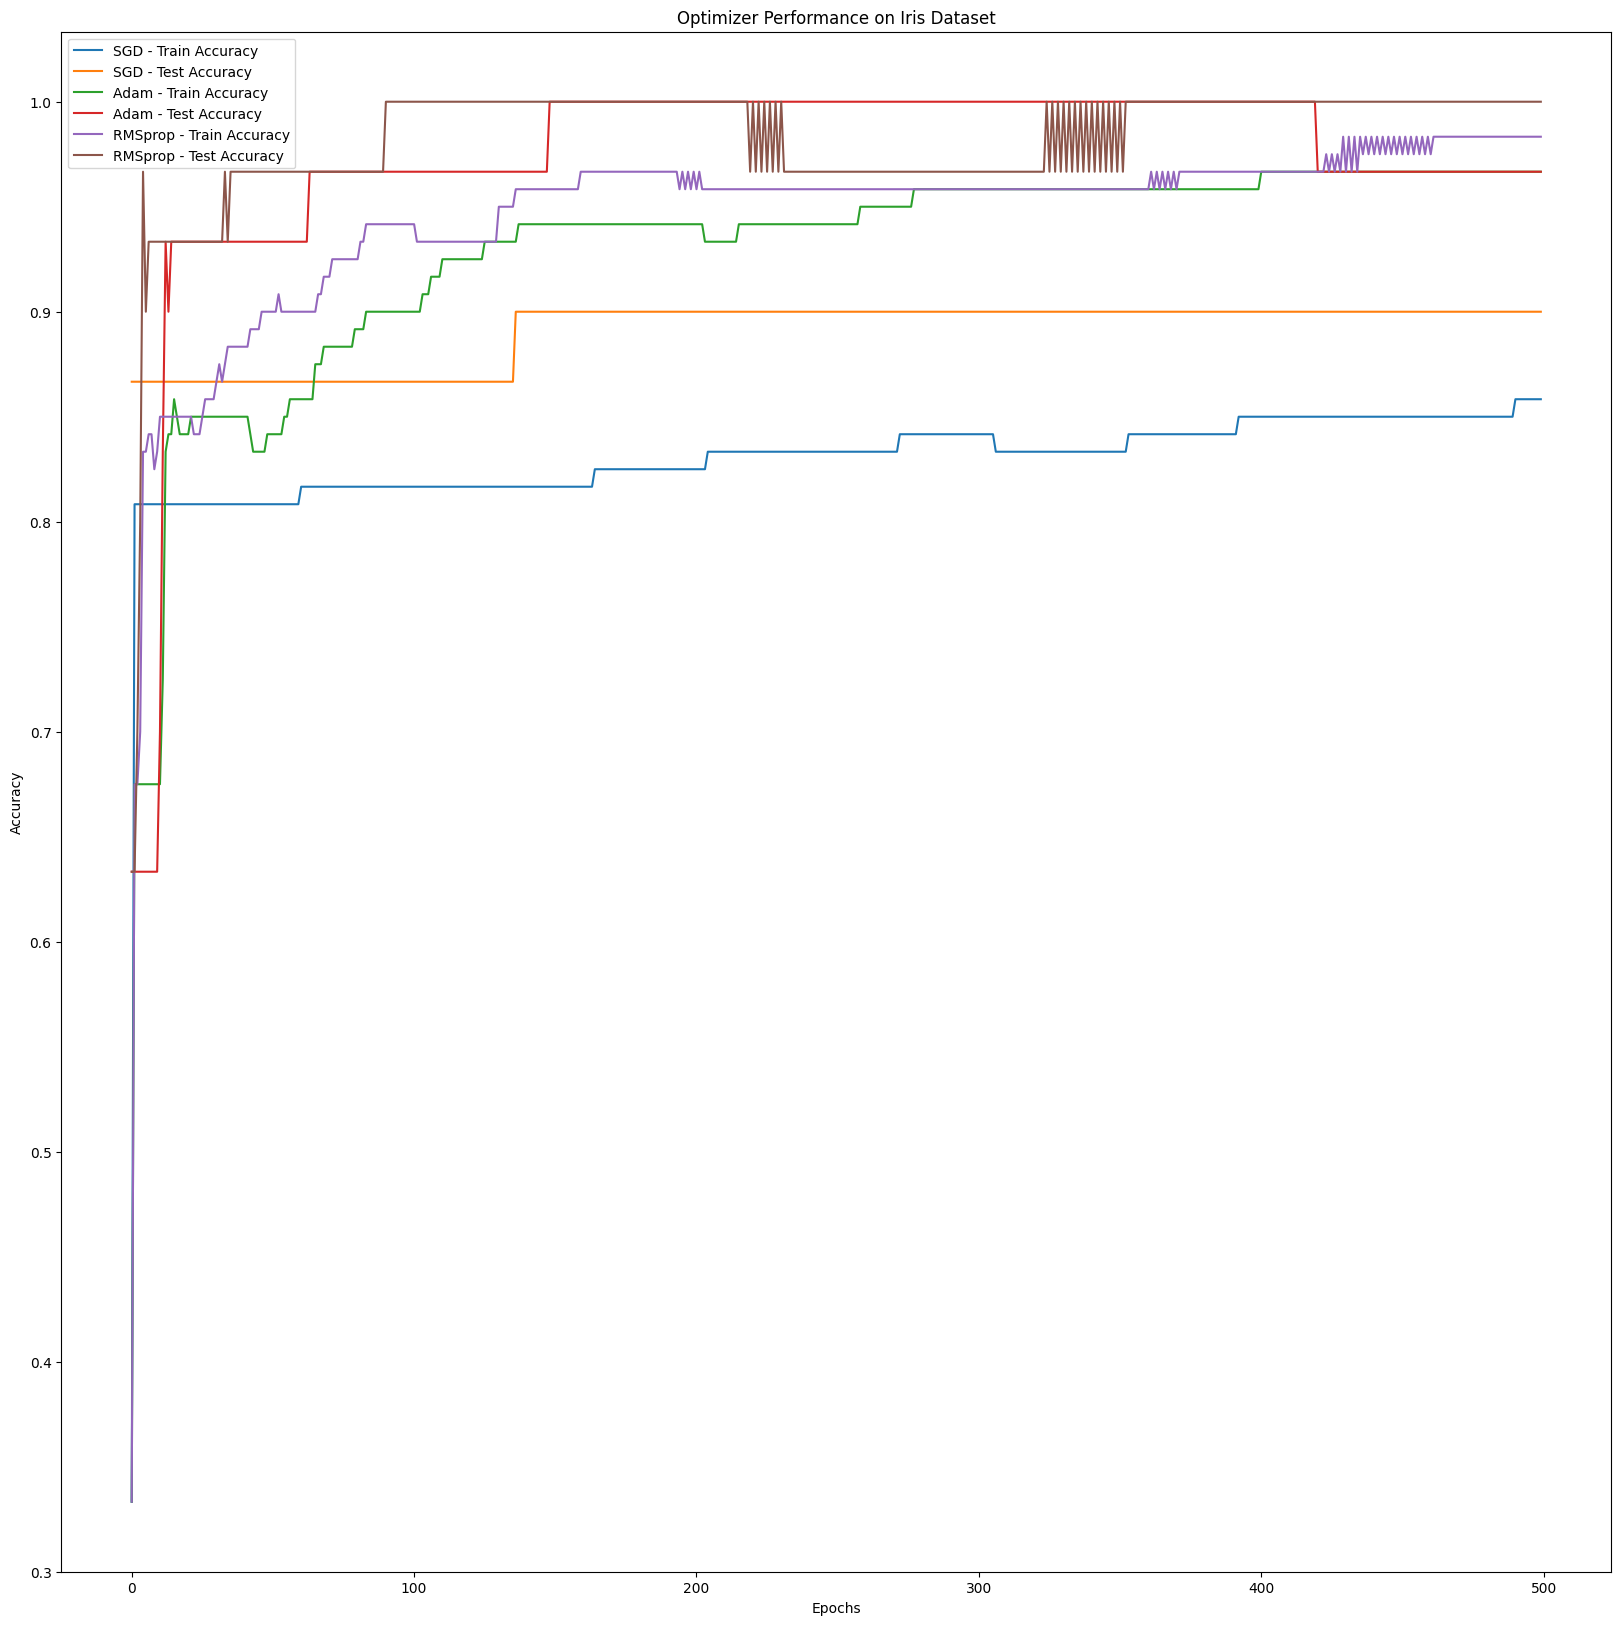

In [ ]:
plt.figure(figsize=(20, 20))

for name, result in results.items():
    plt.plot(result['train_acc'], label=f'{name} - Train Accuracy')
    plt.plot(result['test_acc'], label=f'{name} - Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimizer Performance on Iris Dataset')
plt.legend()
plt.show()